# Import Dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import os
import citipy

In [ ]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

In [1]:
import pandas as pd

import matplotlib as plt
import numpy as np
import os
import citipy
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-39.5010694908508, -115.86884224337052),
 (70.91010486700401, -104.79502367339977),
 (77.57504452020473, 161.80019483928186),
 (83.17659526841496, -139.86113018079098),
 (29.203654303646346, 103.27635893248697),
 (-35.14940853980454, -161.6781354500497),
 (-74.69917703142394, 30.85790231823961),
 (-29.212320924257938, -31.97074917216767),
 (34.95020977326685, -25.720771448569963),
 (39.164598339194555, -77.84983085524146),
 (-53.777301523636304, 62.21438782920421),
 (-55.6973995678505, -28.5448792436695),
 (-55.77599358121013, -157.50522004015693),
 (-14.560231348118506, -178.62324135808578),
 (-49.301854213926795, -105.39129091265755),
 (-77.89885992104682, 112.43382913994895),
 (85.44025395348277, -69.6601110897986),
 (61.830545289108045, -59.453334834961595),
 (-36.4978225919245, -54.760483652624174),
 (43.39555634473891, 97.17755781862081),
 (10.48127578788693, 108.42268644486052),
 (54.595474302445695, 75.8675909712698),
 (89.23689213795805, 140.33249789470352),
 (81.72364465579

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
print(cities)

['rikitea', 'yellowknife', 'cherskiy', 'tuktoyaktuk', 'leshan', 'avarua', 'port elizabeth', 'sao joao da barra', 'vila franca do campo', 'leesburg', 'taolanaro', 'chuy', 'mataura', 'halalo', 'castro', 'albany', 'qaanaaq', 'maniitsoq', 'maldonado', 'yumen', 'phan thiet', 'tatarsk', 'nizhneyansk', 'khatanga', 'albanel', 'puerto ayora', 'johnson city', 'haines junction', 'anadyr', 'souillac', 'shingu', 'linshui', 'tual', 'dikson', 'clyde river', 'carnarvon', 'kiama', 'tokur', 'san francisco', 'fukue', 'jamestown', 'ushuaia', 'atuona', 'leningradskiy', 'bambous virieux', 'butaritari', 'hermanus', 'busselton', 'suzu', 'kurikka', 'pavlovsk', 'krasnoarmeysk', 'marcona', 'belushya guba', 'punta arenas', 'warrington', 'attawapiskat', 'saint george', 'oktyabrskoye', 'bluff', 'klaksvik', 'pisco', 'illoqqortoormiut', 'pacific grove', 'vaini', 'alofi', 'naze', 'nemuro', 'vaitupu', 'chokurdakh', 'tsihombe', 'codrington', 'hobart', 'narsaq', 'coihaique', 'garden city', 'victoria', 'pangody', 'celestu

In [7]:
# Create an empty list to hold the weather data.
url = "https://api.openweathermap.org/data/2.5/weather?"

city_url = url + "&q=" + city.replace(" ","+") + "&appid=" + weather_api_key
print(city_url)
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# #    Parse the JSON and retrieve data.
# city_weather = requests.get(city_url).json()
# # Parse out the needed data.
# city_lat = city_weather["coord"]["lat"]
# city_lng = city_weather["coord"]["lon"]
# city_max_temp = city_weather["main"]["temp_max"]
# city_humidity = city_weather["main"]["humidity"]
# city_clouds = city_weather["clouds"]["all"]
# city_wind = city_weather["wind"]["speed"]
# city_country = city_weather["sys"]["country"]
# # Convert the date to ISO standard.
# city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# # Append the city information into city_data list.
# city_data.append({"City": city.title(),
#                   "Lat": city_lat,
#                   "Lng": city_lng,
#                   "Max Temp": city_max_temp,
#                   "Humidity": city_humidity,
#                   "Cloudiness": city_clouds,
#                   "Wind Speed": city_wind,
#                   "Country": city_country,
#                   "Date": city_date})

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&appid=" + weather_api_key
    print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?&q=college&appid=46fb03b52ce7a8ade53dd6b94226cf94
Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?&q=rikitea&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 1 of Set 1 | rikitea
https://api.openweathermap.org/data/2.5/weather?&q=yellowknife&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 2 of Set 1 | yellowknife
https://api.openweathermap.org/data/2.5/weather?&q=cherskiy&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 3 of Set 1 | cherskiy
https://api.openweathermap.org/data/2.5/weather?&q=tuktoyaktuk&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 4 of Set 1 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?&q=leshan&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 5 of Set 1 | leshan
https://api.openweathermap.org/data/2.5/weather?&q=avarua&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 6 of Set 1 | avarua
https:

https://api.openweathermap.org/data/2.5/weather?&q=attawapiskat&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 7 of Set 2 | attawapiskat
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=saint+george&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 8 of Set 2 | saint george
https://api.openweathermap.org/data/2.5/weather?&q=oktyabrskoye&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 9 of Set 2 | oktyabrskoye
https://api.openweathermap.org/data/2.5/weather?&q=bluff&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 10 of Set 2 | bluff
https://api.openweathermap.org/data/2.5/weather?&q=klaksvik&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 11 of Set 2 | klaksvik
https://api.openweathermap.org/data/2.5/weather?&q=pisco&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 12 of Set 2 | pisco
https://api.openweathermap.org/data/2.5/weather?&q=illoqqortoormiut&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Recor

https://api.openweathermap.org/data/2.5/weather?&q=sinkat&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 15 of Set 3 | sinkat
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=lata&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 16 of Set 3 | lata
https://api.openweathermap.org/data/2.5/weather?&q=thompson&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 17 of Set 3 | thompson
https://api.openweathermap.org/data/2.5/weather?&q=grindavik&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 18 of Set 3 | grindavik
https://api.openweathermap.org/data/2.5/weather?&q=znamenskoye&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 19 of Set 3 | znamenskoye
https://api.openweathermap.org/data/2.5/weather?&q=smithers&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 20 of Set 3 | smithers
https://api.openweathermap.org/data/2.5/weather?&q=san+patricio&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 21 of Set 3 | s

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=mwinilunga&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 23 of Set 4 | mwinilunga
https://api.openweathermap.org/data/2.5/weather?&q=pochutla&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 24 of Set 4 | pochutla
https://api.openweathermap.org/data/2.5/weather?&q=pocone&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 25 of Set 4 | pocone
https://api.openweathermap.org/data/2.5/weather?&q=barentsburg&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 26 of Set 4 | barentsburg
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=kotelnich&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 27 of Set 4 | kotelnich
https://api.openweathermap.org/data/2.5/weather?&q=khonuu&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 28 of Set 4 | khonuu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=luderitz&appid=46fb03

https://api.openweathermap.org/data/2.5/weather?&q=adrar&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 30 of Set 5 | adrar
https://api.openweathermap.org/data/2.5/weather?&q=moncada&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 31 of Set 5 | moncada
https://api.openweathermap.org/data/2.5/weather?&q=zuya&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 32 of Set 5 | zuya
https://api.openweathermap.org/data/2.5/weather?&q=tumannyy&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 33 of Set 5 | tumannyy
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=nanortalik&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 34 of Set 5 | nanortalik
https://api.openweathermap.org/data/2.5/weather?&q=bethel&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 35 of Set 5 | bethel
https://api.openweathermap.org/data/2.5/weather?&q=rio+grande&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 36 of Set 5 | rio grande
http

https://api.openweathermap.org/data/2.5/weather?&q=salym&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 39 of Set 6 | salym
https://api.openweathermap.org/data/2.5/weather?&q=formosa+do+rio+preto&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 40 of Set 6 | formosa do rio preto
https://api.openweathermap.org/data/2.5/weather?&q=diu&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 41 of Set 6 | diu
https://api.openweathermap.org/data/2.5/weather?&q=kidal&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 42 of Set 6 | kidal
https://api.openweathermap.org/data/2.5/weather?&q=sangar&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 43 of Set 6 | sangar
https://api.openweathermap.org/data/2.5/weather?&q=havoysund&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 44 of Set 6 | havoysund
https://api.openweathermap.org/data/2.5/weather?&q=samalaeulu&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 45 of Set 6 | samalaeulu
City not found. 

https://api.openweathermap.org/data/2.5/weather?&q=meulaboh&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 47 of Set 7 | meulaboh
https://api.openweathermap.org/data/2.5/weather?&q=severo-kurilsk&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 48 of Set 7 | severo-kurilsk
https://api.openweathermap.org/data/2.5/weather?&q=wulanhaote&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 49 of Set 7 | wulanhaote
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=sur&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 50 of Set 7 | sur
https://api.openweathermap.org/data/2.5/weather?&q=chapleau&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 1 of Set 8 | chapleau
https://api.openweathermap.org/data/2.5/weather?&q=winton&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 2 of Set 8 | winton
https://api.openweathermap.org/data/2.5/weather?&q=aklavik&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 3 of Set 8 | akl

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=miri&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 5 of Set 9 | miri
https://api.openweathermap.org/data/2.5/weather?&q=aykhal&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 6 of Set 9 | aykhal
https://api.openweathermap.org/data/2.5/weather?&q=kutum&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 7 of Set 9 | kutum
https://api.openweathermap.org/data/2.5/weather?&q=asau&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 8 of Set 9 | asau
https://api.openweathermap.org/data/2.5/weather?&q=svetlaya&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 9 of Set 9 | svetlaya
https://api.openweathermap.org/data/2.5/weather?&q=cockburn+town&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 10 of Set 9 | cockburn town
https://api.openweathermap.org/data/2.5/weather?&q=saint-joseph&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 11 of Set 9 | saint-joseph
https

https://api.openweathermap.org/data/2.5/weather?&q=parrita&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 13 of Set 10 | parrita
https://api.openweathermap.org/data/2.5/weather?&q=juifang&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 14 of Set 10 | juifang
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=merauke&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 15 of Set 10 | merauke
https://api.openweathermap.org/data/2.5/weather?&q=port+hedland&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 16 of Set 10 | port hedland
https://api.openweathermap.org/data/2.5/weather?&q=ulaangom&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 17 of Set 10 | ulaangom
https://api.openweathermap.org/data/2.5/weather?&q=volkhov&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 18 of Set 10 | volkhov
https://api.openweathermap.org/data/2.5/weather?&q=toba&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 19 of Set 10 

https://api.openweathermap.org/data/2.5/weather?&q=san+martin&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 21 of Set 11 | san martin
https://api.openweathermap.org/data/2.5/weather?&q=kuhestan&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 22 of Set 11 | kuhestan
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=anisoc&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 23 of Set 11 | anisoc
https://api.openweathermap.org/data/2.5/weather?&q=herxheim&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 24 of Set 11 | herxheim
https://api.openweathermap.org/data/2.5/weather?&q=talara&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 25 of Set 11 | talara
https://api.openweathermap.org/data/2.5/weather?&q=altamont&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 26 of Set 11 | altamont
https://api.openweathermap.org/data/2.5/weather?&q=graham&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 27 of Set 11 | 

https://api.openweathermap.org/data/2.5/weather?&q=old+town&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 29 of Set 12 | old town
https://api.openweathermap.org/data/2.5/weather?&q=labuhan&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 30 of Set 12 | labuhan
https://api.openweathermap.org/data/2.5/weather?&q=kalavrita&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 31 of Set 12 | kalavrita
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=merritt+island&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 32 of Set 12 | merritt island
https://api.openweathermap.org/data/2.5/weather?&q=saint+andrews&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 33 of Set 12 | saint andrews
https://api.openweathermap.org/data/2.5/weather?&q=paramonga&appid=46fb03b52ce7a8ade53dd6b94226cf94
Processing Record 34 of Set 12 | paramonga
https://api.openweathermap.org/data/2.5/weather?&q=nueve+de+julio&appid=46fb03b52ce7a8ade53dd6b94226cf

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,298.40,77,98,8.59,PF,2022-04-21 15:16:04
1,Yellowknife,62.4560,-114.3525,266.44,53,20,2.06,CA,2022-04-21 15:18:22
2,Cherskiy,68.7500,161.3000,263.92,97,100,1.28,RU,2022-04-21 15:16:52
3,Tuktoyaktuk,69.4541,-133.0374,251.15,77,40,0.00,CA,2022-04-21 15:18:23
4,Leshan,29.5623,103.7639,293.84,69,0,1.54,CN,2022-04-21 15:18:23
5,Avarua,-21.2078,-159.7750,298.18,65,75,4.12,CK,2022-04-21 15:18:24
6,Port Elizabeth,-33.9180,25.5701,296.10,56,14,2.24,ZA,2022-04-21 15:13:48
7,Sao Joao Da Barra,-21.6403,-41.0511,302.20,67,9,1.22,BR,2022-04-21 15:18:24
8,Vila Franca Do Campo,37.7167,-25.4333,289.38,63,100,7.07,PT,2022-04-21 15:18:25
9,Leesburg,39.1157,-77.5636,289.87,63,40,7.20,US,2022-04-21 15:18:25


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Humidity','Max Temp','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Humidity,Max Temp,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-21 15:16:04,-23.1203,-134.9692,77,298.40,98,8.59
1,Yellowknife,CA,2022-04-21 15:18:22,62.4560,-114.3525,53,266.44,20,2.06
2,Cherskiy,RU,2022-04-21 15:16:52,68.7500,161.3000,97,263.92,100,1.28
3,Tuktoyaktuk,CA,2022-04-21 15:18:23,69.4541,-133.0374,77,251.15,40,0.00
4,Leshan,CN,2022-04-21 15:18:23,29.5623,103.7639,69,293.84,0,1.54


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

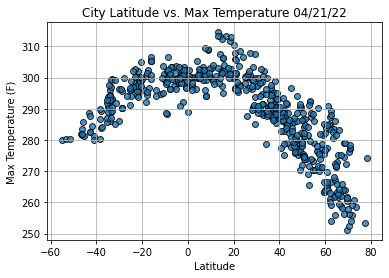

In [13]:
# Import time module
import time

# Did not work with dependencies as they were. found this code on StackOverflow 
# https://stackoverflow.com/questions/58540629/attributeerror-module-matplotlib-has-no-attribute-scatter
from matplotlib import pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


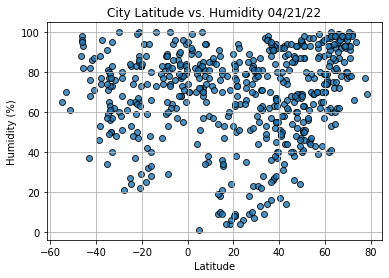

In [14]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

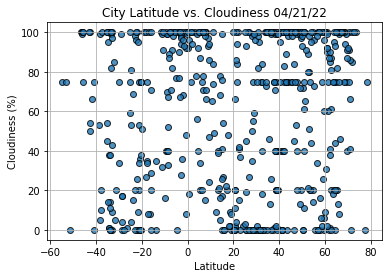

In [15]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. windspeed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Cloudines")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()